acceptance = 0.7880000000000006 
<q> = 0.11061372068390152 
<q^2> = 1.0192810147646807


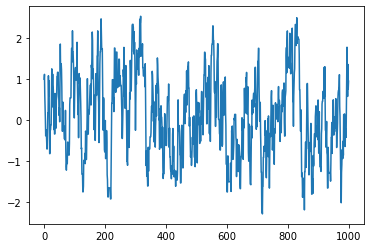

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo harmonic oscillator

# Exercise 3, part 1

np.random.seed(1998)


def pdf(qold,qnew):
    
    return np.exp((qold**2-qnew**2)/2)

# see correction: if delta energy < 0, is not necessary to evaluate
# the exponential and the code becomes faster

def MC_run(delta=1,q0=1,n_step=int(1e3)):
    
    q = [q0]
    acceptance = 0
    
    for i in range(n_step):
        qnew = q[-1] + np.random.uniform(-delta,delta,1)
        prob = pdf(q[-1],qnew)
        
        if prob < 1:
            alpha = prob
        else: alpha = 1
            
        omega = np.random.uniform(0,1,1)
        if omega < alpha:
            q.append(qnew)
            acceptance += 1/n_step
        else: q.append(q[-1])
            
    return acceptance,np.array(q,dtype="float")


acceptance,q = MC_run()
q_mean = np.mean(q)
q2_mean = np.mean(q**2)

plt.plot(q)
print("acceptance =", acceptance, "\n<q> =", q_mean,"\n<q^2> =", q2_mean)

Text(0, 0.5, 'acceptance')

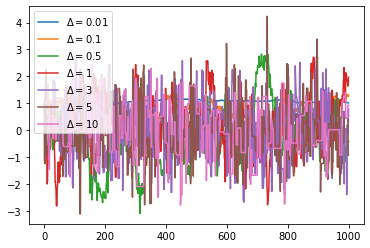

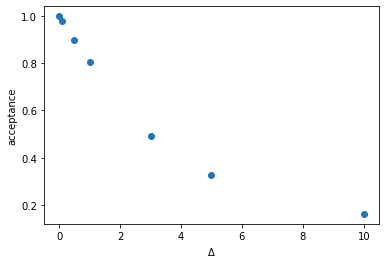

In [13]:
# Exercise 3, part 2: Different values of delta

n_tries = 10
delta_values = (0.01,0.1,0.5,1,3,5,10)
acceptance = []

for delta in delta_values:
    acc_mean = 0
    
    for i in range (n_tries):
        acc_i,q = MC_run(delta=delta)
        acc_mean += acc_i/n_tries
    
    acceptance.append(acc_mean)
    
    plt.figure(1)
    plt.plot(q,label = "$\Delta = $" +str(delta))
    plt.legend()
    
plt.figure(2)
plt.scatter(delta_values,acceptance)
plt.xlabel("$\Delta$")
plt.ylabel("acceptance")

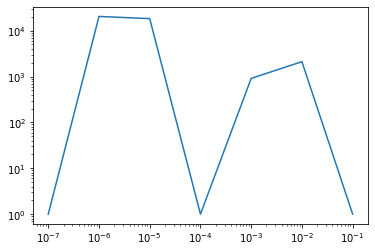

In [8]:
# Exercise 3, part 3: compute <q^2> with a given accuracy

# the accuracy scales with sqrt(n_step)

def new_config(delta,q):
    qnew = q + np.random.uniform(-delta,delta,1)
    prob = pdf(q,qnew)

    if prob < 1:
        alpha = prob
    else: alpha = 1

    omega = np.random.uniform(0,1,1)
    if omega < alpha:
        q = qnew
        
    return q

        
def MC_q2_acc(delta=2,q0=1,accuracy=1e-3):

    q = q0
    diff = 1
    n_step = 0
    q2_i = 0
    q2_mean = []
    
    while accuracy < diff:       
        q = new_config(delta,q)
        n_step += 1
        q2_i += q**2
        diff = np.abs(1 - q2_i/n_step)
        q2_mean.append(q2_i/n_step)
           
    return np.array(q2_mean,dtype="float"), n_step


n_step_values = []
accuracy_values = (1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1)
n_tries = 1

for accuracy in accuracy_values:
    n_step = 0
    
    for i in range(n_tries):
        q2_mean,n_step_i = MC_q2_acc(accuracy = accuracy)
        n_step += n_step_i/n_tries
        
    n_step_values.append(n_step)
    
plt.loglog(accuracy_values,n_step_values)



In [14]:
# Exercise 3, part 4: 2 particles in 3D connected by a spring of length L

import math

def pdf_3D (q_old,q_new,L):

    return np.exp( ( ( np.sum( (q_old[0]-q_old[1])**2)**0.5 -L)**2 
                    - (np.sum( (q_new[0]-q_new[1])**2)**0.5 -L)**2)/2 )


def MC_3D(q,delta=5,L=4,n_step=int(1e4)):
    
    q_mean = np.sum((q[0]-q[1])**2)**0.5/n_step
    acceptance = 0
    
    for k in range(n_step):
        i = np.random.randint(2)
        j = np.random.randint(3)

        q_new = q.copy()   # equal to q_new = +q
        q_new[i][j] += np.random.uniform(-delta,delta,1)
        prob = pdf_3D(q,q_new,L)

        if prob < 1:
            alpha = prob
        else: alpha = 1

        omega = np.random.uniform(0,1,1)
        if omega < alpha:
            q = q_new.copy()
            acceptance += 1/n_step
        
        q_mean += np.sum((q[0]-q[1])**2)**0.5/n_step
        
    return q_mean,acceptance

          
q = np.array([[1,1,1],[0,0,0]],dtype = "float")
n_tries = 10

for i in range(n_tries):
    q_mean,acceptance = MC_3D(q)
    print("acceptance =", "{:.4f}".format(acceptance),
          "\t\t<q> =", "{:.4f}".format(q_mean))  
    
# bigger then 4, because there are more possible states available
# the distribution it follows is, in 3D:
# p(x) = x^2*0.5*(x-4)^2 for the distance
# For 2D, it would be x*...
# ( because the number of states is proportional to the area of the 
# sphere centered in one of the particles) 
# (like for the position of the electron in the atom)
# it is an entropic contribution, and the system doesn't minimize E, 
# but the free energy F, given by -kTlog(p(D))

acceptance = 0.5765 		<q> = 4.4716
acceptance = 0.5763 		<q> = 4.4883
acceptance = 0.5822 		<q> = 4.4634
acceptance = 0.5760 		<q> = 4.4186
acceptance = 0.5884 		<q> = 4.4428
acceptance = 0.5743 		<q> = 4.4880
acceptance = 0.5810 		<q> = 4.5041
acceptance = 0.5818 		<q> = 4.4756
acceptance = 0.5744 		<q> = 4.4916
acceptance = 0.5757 		<q> = 4.4760
